In [48]:
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

df_train = pd.read_csv('./data/train.csv')
df_aux = df_train

#### Con el set de entrenamiento:

In [49]:
columnas = ['metroscubiertos', 'metrostotales', 'antiguedad', 'habitaciones', 'garages', 'banos',
            'lat', 'lng', 'escuelascercanas', 'centroscomercialescercanos']
df = df_aux[columnas]

for columna in columnas:
    df[columna] = df[columna].fillna(df[columna].mean())
df

/home/tomas/Escritorio/kmeans/datos-tp2/.venv/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


metroscubiertos  metrostotales  antiguedad  habitaciones  garages  \
0                  80.0      80.000000    8.116114           2.0      1.0   
1                 268.0     180.000000   10.000000           3.0      2.0   
2                 144.0     166.000000    5.000000           3.0      2.0   
3                  63.0      67.000000    1.000000           2.0      1.0   
4                  95.0      95.000000   10.000000           2.0      1.0   
...                 ...            ...         ...           ...      ...   
239995             67.0     176.765145    0.000000           2.0      2.0   
239996            200.0     250.000000    0.000000           3.0      3.0   
239997            138.0     138.000000   20.000000           2.0      1.0   
239998            235.0     137.000000   20.000000           4.0      0.0   
239999            149.0     176.765145    1.000000           3.0      2.0   

        banos        lat        lng  escuelascercanas  \
0         2.0  20.696818 -99.509221               0.0   
1         2.0  19.310205 -99.227655               1.0   
2         2.0  20.696818 -99.509221               0.0   
3         1.0  19.301890 -99.688015               1.0   
4         1.0  20.696818 -99.509221               0.0   
...       ...        ...        ...               ...   
239995    1.0  20.696818 -99.509221               0.0   
239996    3.0  19.294665 -99.692916               1.0   
239997    2.0  20.696818 -99.509221               0.0   
239998    4.0  19.366651 -99.082246               1.0   
239999    2.0  20.696818 -99.509221               0.0   

        centroscomercialescercanos  
0                              0.0  
1                              1.0  
2                              0.0  
3                              1.0  
4                              0.0  
...                            ...  
239995                         0.0  
239996                         1.0  
239997                         0.0  
239998                         1.0  
239999                         0.0  

[240000 rows x 10 columns]

In [50]:
# Normalizacion
x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)

df.columns = columnas

display(df)
display(df.dtypes)

# for columna in columnas:
#     df[columna] = df[columna].astype(int)
df

metroscubiertos  metrostotales  antiguedad  habitaciones   garages  \
0              0.153302       0.153302    0.101451      0.111111  0.333333   
1              0.596698       0.389151    0.125000      0.222222  0.666667   
2              0.304245       0.356132    0.062500      0.222222  0.666667   
3              0.113208       0.122642    0.012500      0.111111  0.333333   
4              0.188679       0.188679    0.125000      0.111111  0.333333   
...                 ...            ...         ...           ...       ...   
239995         0.122642       0.381522    0.000000      0.111111  0.666667   
239996         0.436321       0.554245    0.000000      0.222222  1.000000   
239997         0.290094       0.290094    0.250000      0.111111  0.333333   
239998         0.518868       0.287736    0.250000      0.333333  0.000000   
239999         0.316038       0.381522    0.012500      0.222222  0.666667   

           banos       lat       lng  escuelascercanas  \
0       0.333333  0.661093  0.106726               0.0   
1       0.333333  0.653553  0.107866               1.0   
2       0.333333  0.661093  0.106726               0.0   
3       0.000000  0.653508  0.106002               1.0   
4       0.000000  0.661093  0.106726               0.0   
...          ...       ...       ...               ...   
239995  0.000000  0.661093  0.106726               0.0   
239996  0.666667  0.653469  0.105982               1.0   
239997  0.333333  0.661093  0.106726               0.0   
239998  1.000000  0.653860  0.108455               1.0   
239999  0.333333  0.661093  0.106726               0.0   

        centroscomercialescercanos  
0                              0.0  
1                              1.0  
2                              0.0  
3                              1.0  
4                              0.0  
...                            ...  
239995                         0.0  
239996                         1.0  
239997                         0.0  
239998                         1.0  
239999                         0.0  

[240000 rows x 10 columns]

metroscubiertos               float64
metrostotales                 float64
antiguedad                    float64
habitaciones                  float64
garages                       float64
banos                         float64
lat                           float64
lng                           float64
escuelascercanas              float64
centroscomercialescercanos    float64
dtype: object

metroscubiertos  metrostotales  antiguedad  habitaciones   garages  \
0              0.153302       0.153302    0.101451      0.111111  0.333333   
1              0.596698       0.389151    0.125000      0.222222  0.666667   
2              0.304245       0.356132    0.062500      0.222222  0.666667   
3              0.113208       0.122642    0.012500      0.111111  0.333333   
4              0.188679       0.188679    0.125000      0.111111  0.333333   
...                 ...            ...         ...           ...       ...   
239995         0.122642       0.381522    0.000000      0.111111  0.666667   
239996         0.436321       0.554245    0.000000      0.222222  1.000000   
239997         0.290094       0.290094    0.250000      0.111111  0.333333   
239998         0.518868       0.287736    0.250000      0.333333  0.000000   
239999         0.316038       0.381522    0.012500      0.222222  0.666667   

           banos       lat       lng  escuelascercanas  \
0       0.333333  0.661093  0.106726               0.0   
1       0.333333  0.653553  0.107866               1.0   
2       0.333333  0.661093  0.106726               0.0   
3       0.000000  0.653508  0.106002               1.0   
4       0.000000  0.661093  0.106726               0.0   
...          ...       ...       ...               ...   
239995  0.000000  0.661093  0.106726               0.0   
239996  0.666667  0.653469  0.105982               1.0   
239997  0.333333  0.661093  0.106726               0.0   
239998  1.000000  0.653860  0.108455               1.0   
239999  0.333333  0.661093  0.106726               0.0   

        centroscomercialescercanos  
0                              0.0  
1                              1.0  
2                              0.0  
3                              1.0  
4                              0.0  
...                            ...  
239995                         0.0  
239996                         1.0  
239997                         0.0  
239998                         1.0  
239999                         0.0  

[240000 rows x 10 columns]

In [51]:
X = np.array(df[columnas])
y = np.array(df_aux['precio'])

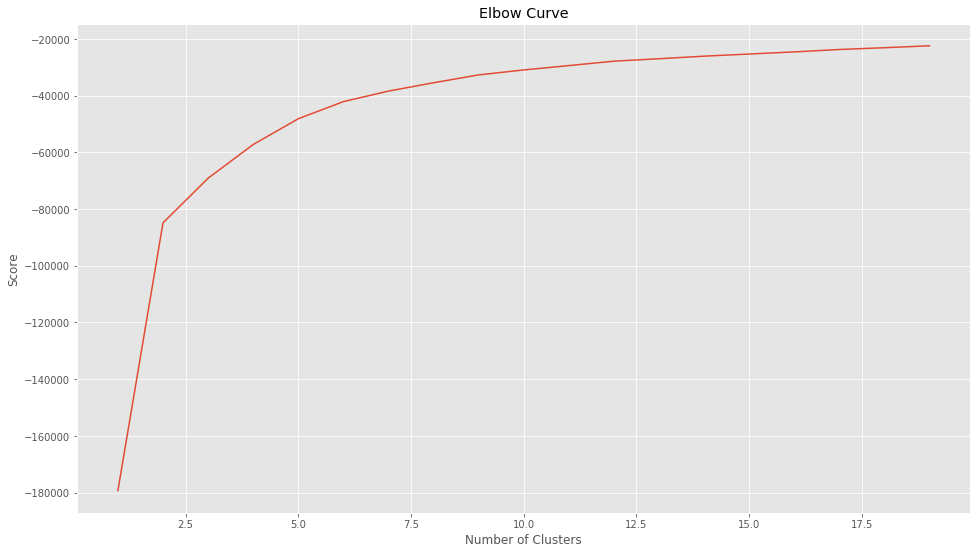

In [52]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
# score = [kmeans[i].fit(X).score(X) for i in range(20)]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()


# Vamos a usar 6

In [53]:
# Elijo 6 como un buen valor de K. Pero podría ser otro.

kmeans = KMeans(n_clusters=6).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[ 3.27671212e-01  3.63702395e-01  9.09871046e-02  2.04047715e-01
   6.46685868e-01  3.11104665e-01  6.62445249e-01  1.06390095e-01
  -1.50046642e-13  5.50658944e-02]
 [ 5.61106587e-01  4.99561027e-01  1.04415011e-01  2.63383016e-01
   6.98745585e-01  6.21896688e-01  6.59893853e-01  1.06161189e-01
   1.00000000e+00  1.00000000e+00]
 [ 2.40284616e-01  3.03884773e-01  1.08538648e-01  1.70468814e-01
   2.26995953e-01  1.82402481e-01  6.61115677e-01  1.07118091e-01
  -1.49658064e-13  5.71905567e-02]
 [ 2.28156444e-01  2.73931049e-01  9.78919440e-02  1.77216131e-01
   4.33024150e-01  1.94870923e-01  6.60536674e-01  1.05209193e-01
   1.00000000e+00  1.00000000e+00]
 [ 3.94993375e-01  4.01158489e-01  1.02552508e-01  2.18828535e-01
   5.27664098e-01  3.85101716e-01  6.61423067e-01  1.07254372e-01
   1.00000000e+00 -1.41275880e-13]
 [ 6.11742804e-01  5.23326718e-01  1.07283434e-01  2.64022472e-01
   6.39003925e-01  7.10100851e-01  6.61095360e-01  1.08961843e-01
  -1.45494727e-13  5.01370635e-02

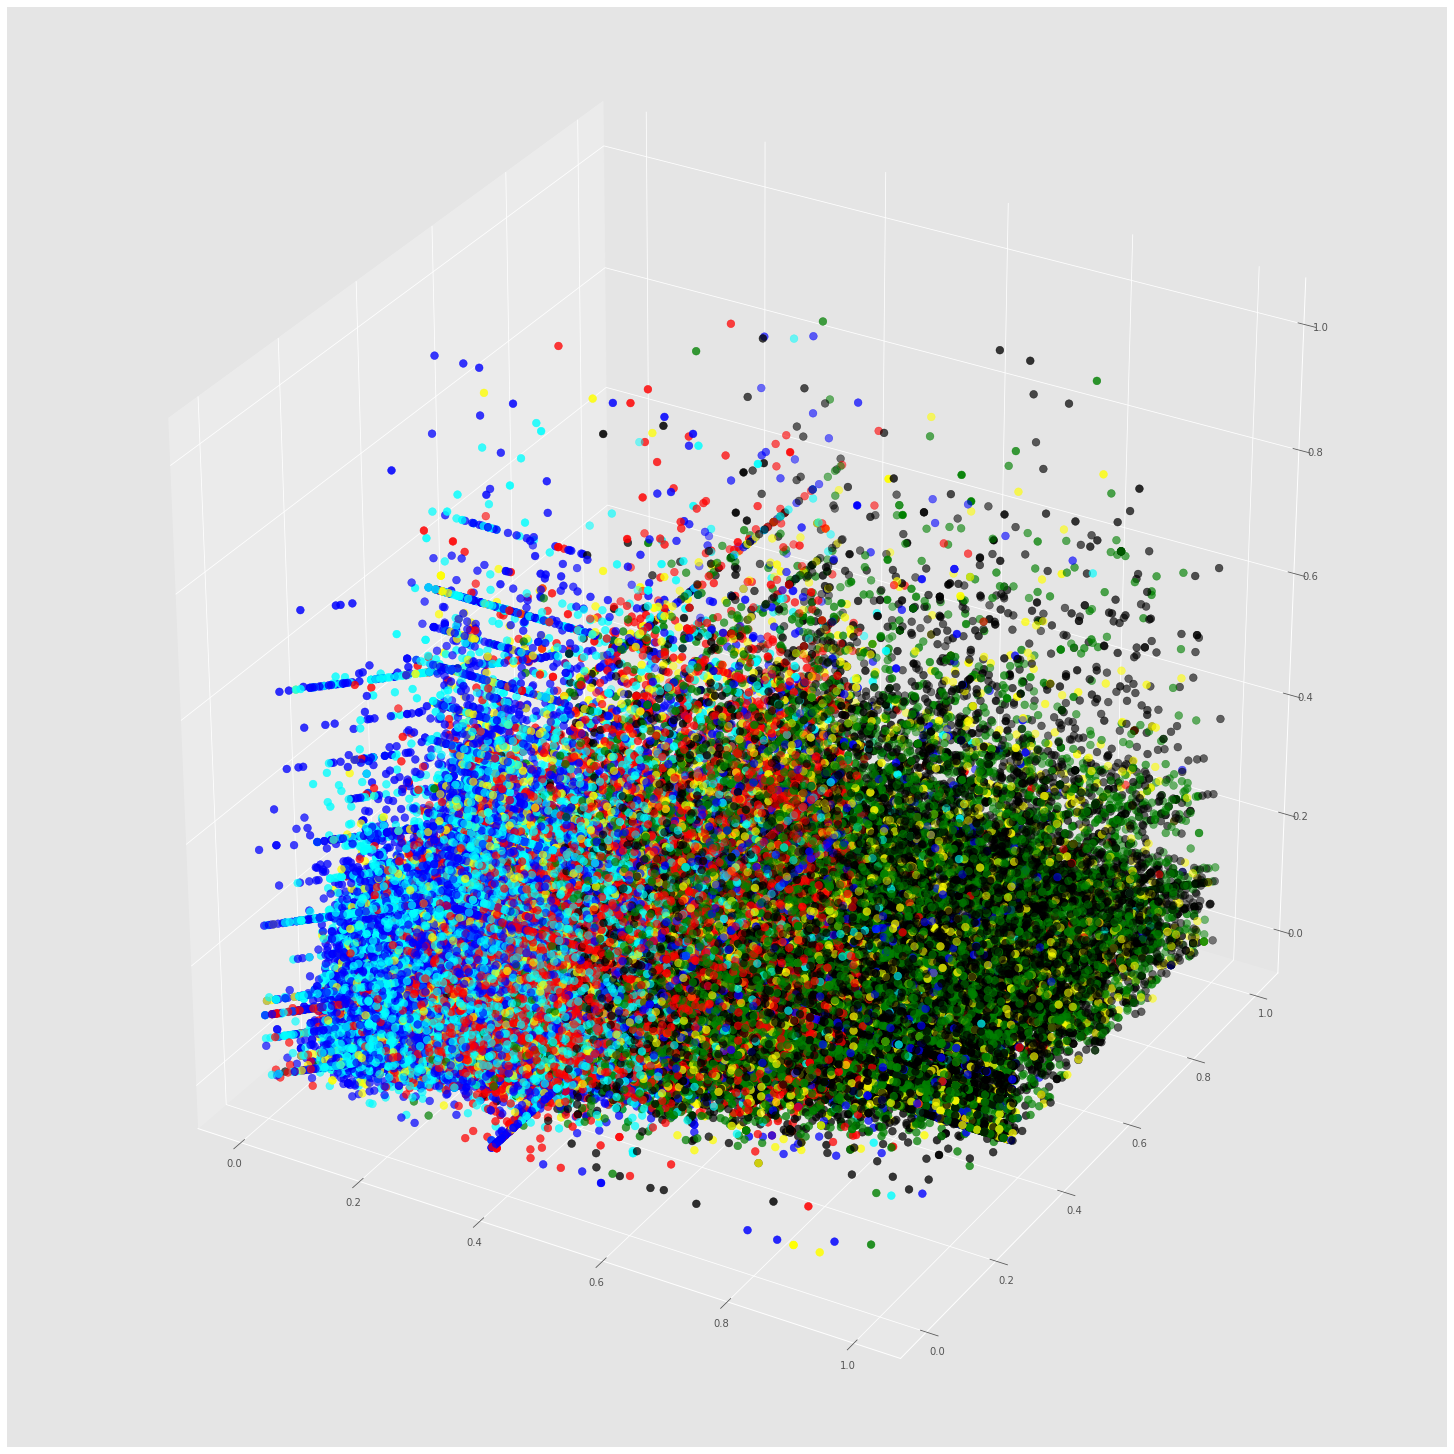

In [54]:
# Obtenemos las etiquetas de cada punto de nuestros datos
labels = kmeans.predict(X)
# Obtenemos los centroids
C = kmeans.cluster_centers_
colores=['red','green','blue','cyan','yellow', 'black']
asignar=[]
for row in labels:
    asignar.append(colores[row])

fig = plt.figure(figsize=(20,20))
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

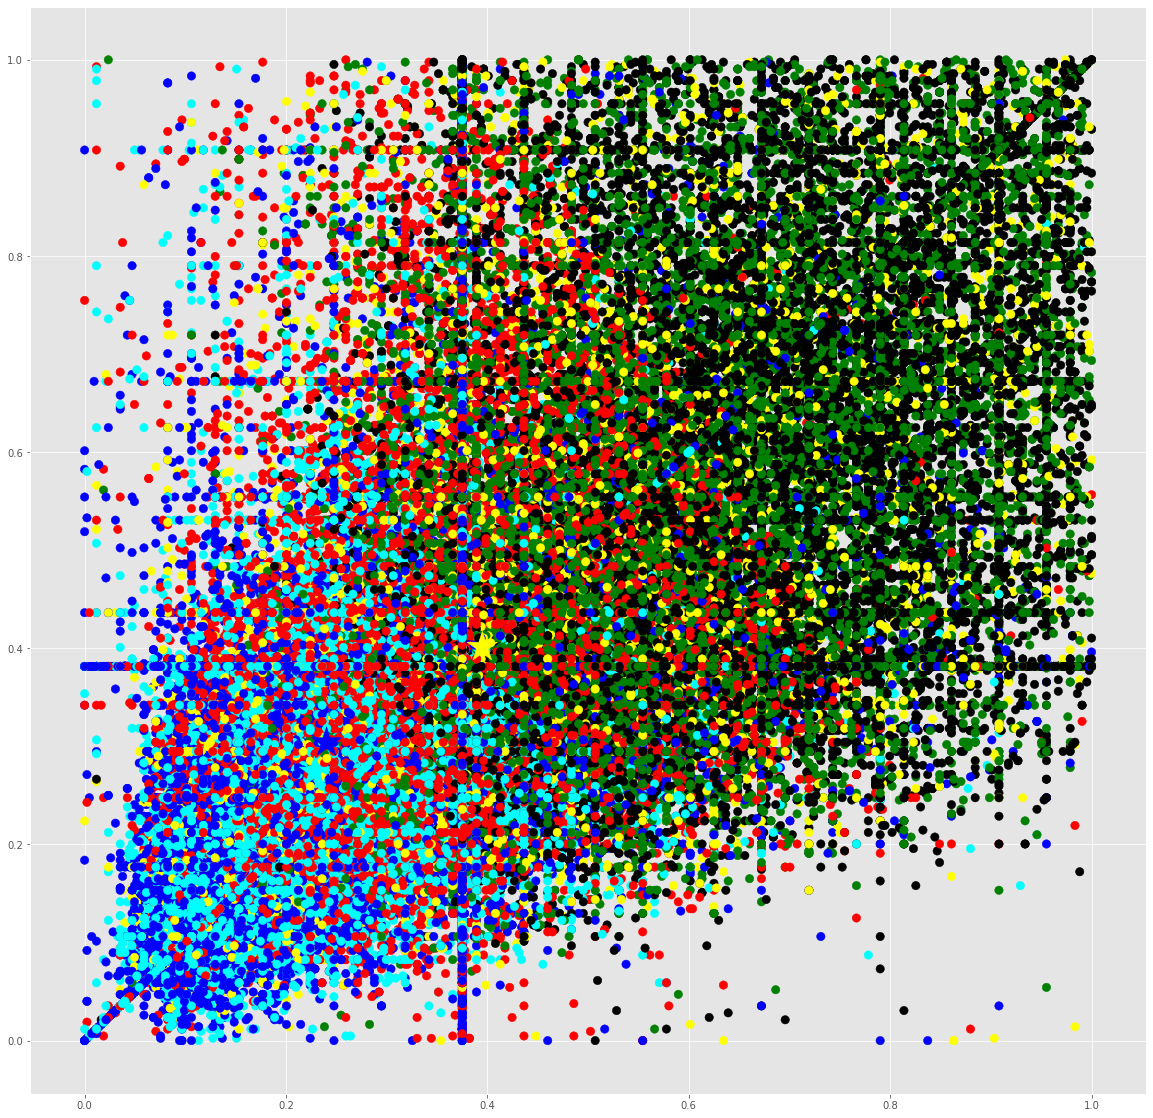

In [55]:
# Hacemos una proyección a 2D con los diversos ejes 
f1 = df['metroscubiertos'].values
f2 = df['metrostotales'].values

plt.figure(figsize=(20,20))
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

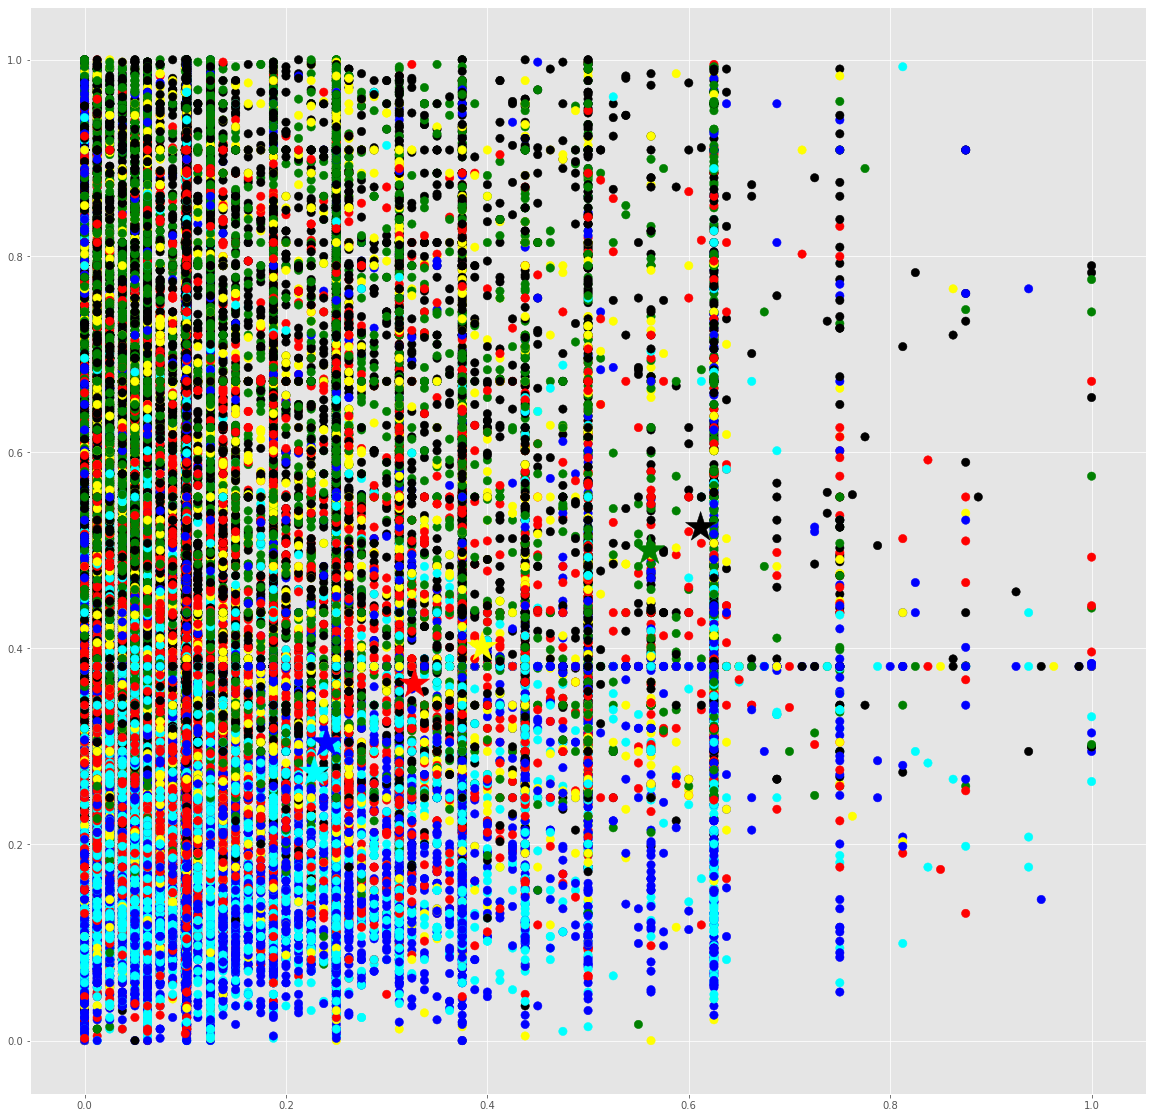

In [56]:
# Hacemos una proyección a 2D con los diversos ejes 
f1 = df['antiguedad'].values
f2 = df['metrostotales'].values

plt.figure(figsize=(20,20))
plt.scatter(f1, f2, c=asignar, s=70, )
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

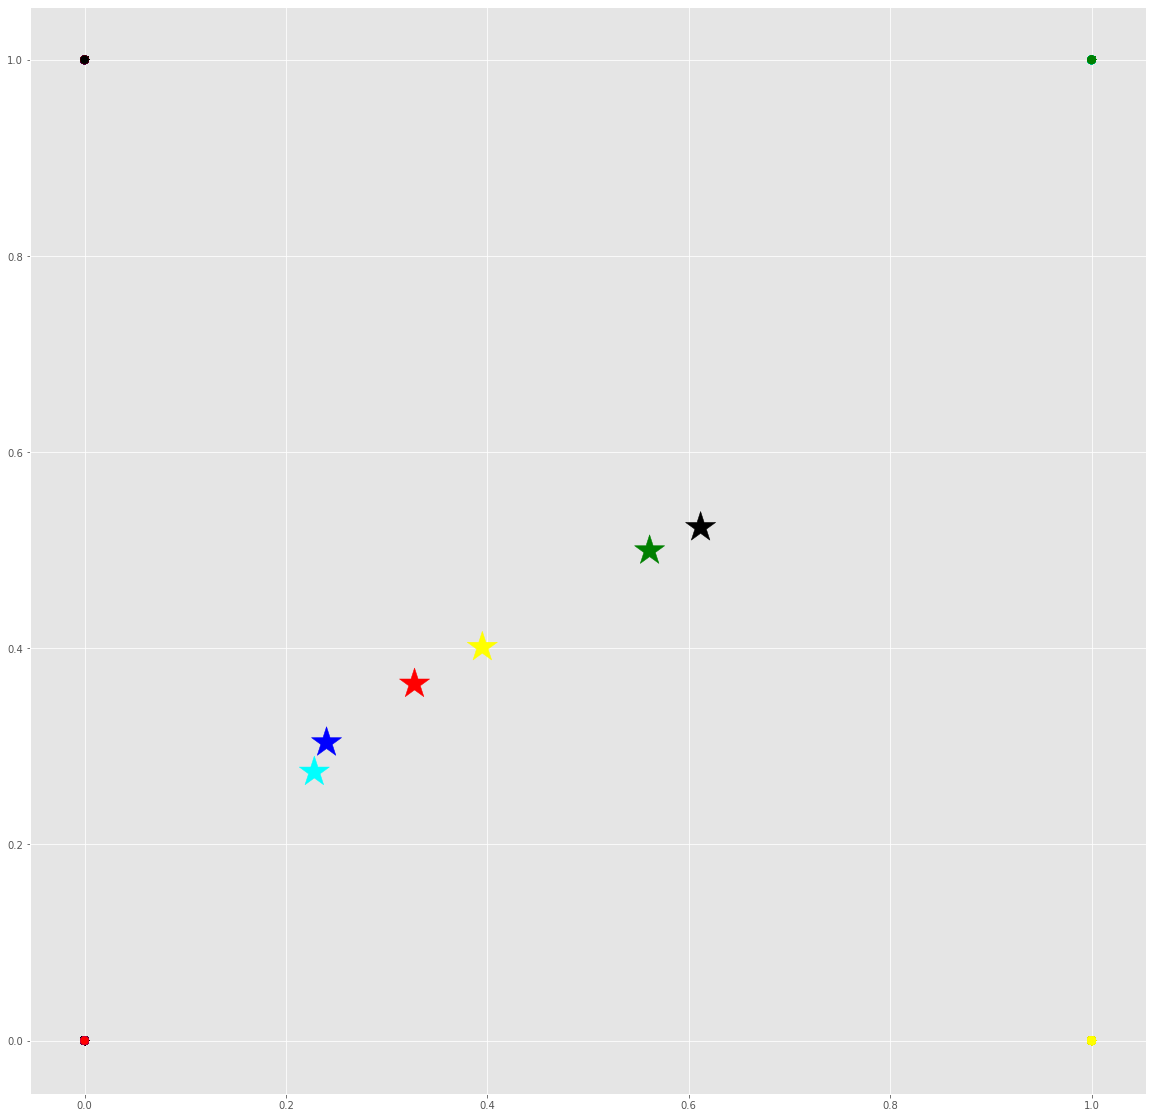

In [57]:
# Hacemos una proyección a 2D con los diversos ejes 
f1 = df['escuelascercanas'].values
f2 = df['centroscomercialescercanos'].values

plt.figure(figsize=(20,20))
plt.scatter(f1, f2, c=asignar, s=70, )
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

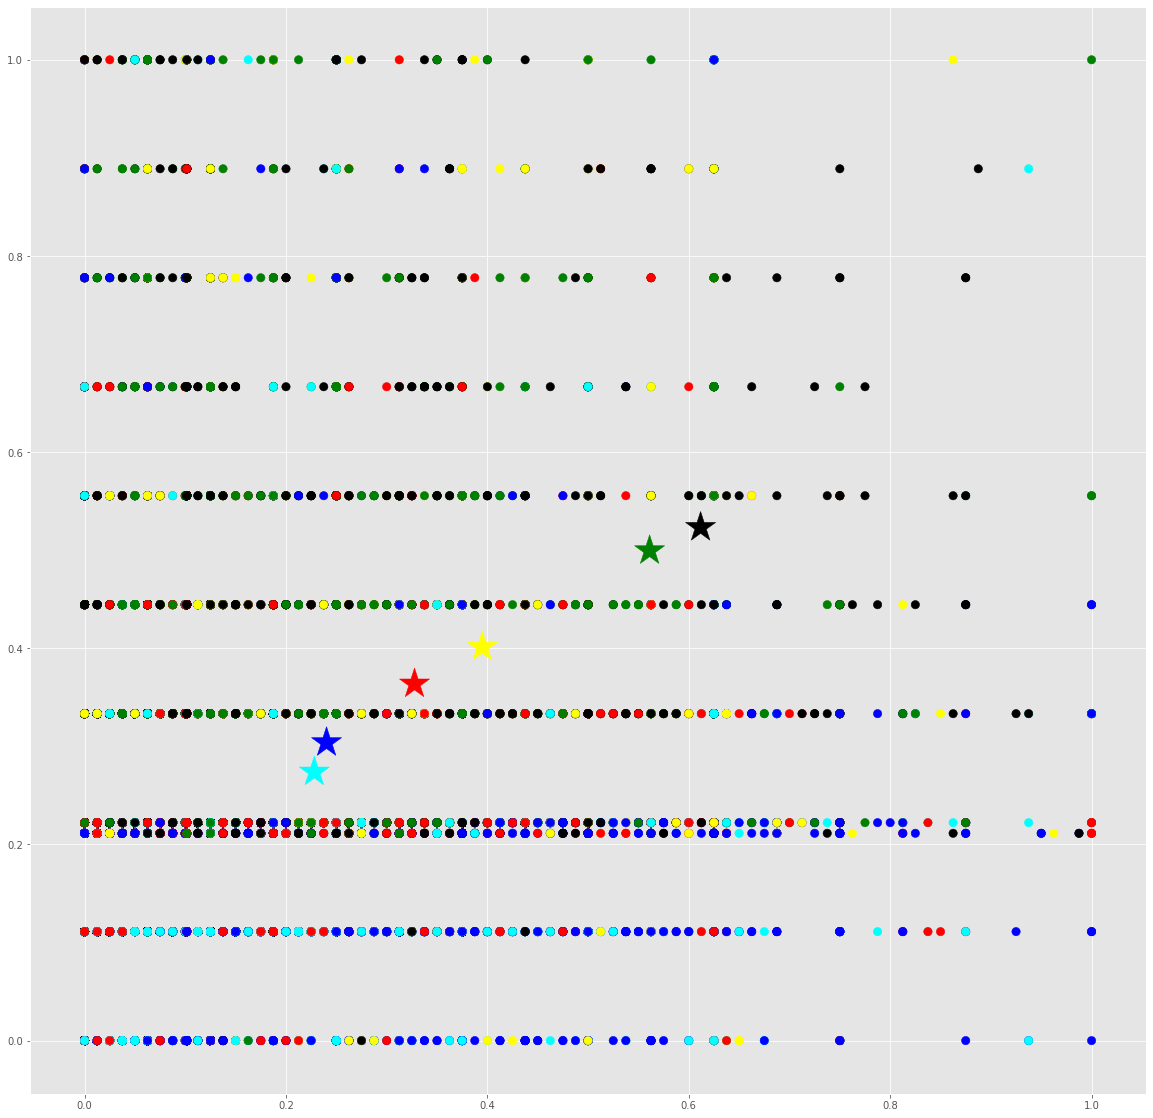

In [58]:
# Hacemos una proyección a 2D con los diversos ejes 
f1 = df['antiguedad'].values
f2 = df['habitaciones'].values

plt.figure(figsize=(20,20))
plt.scatter(f1, f2, c=asignar, s=70, )
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

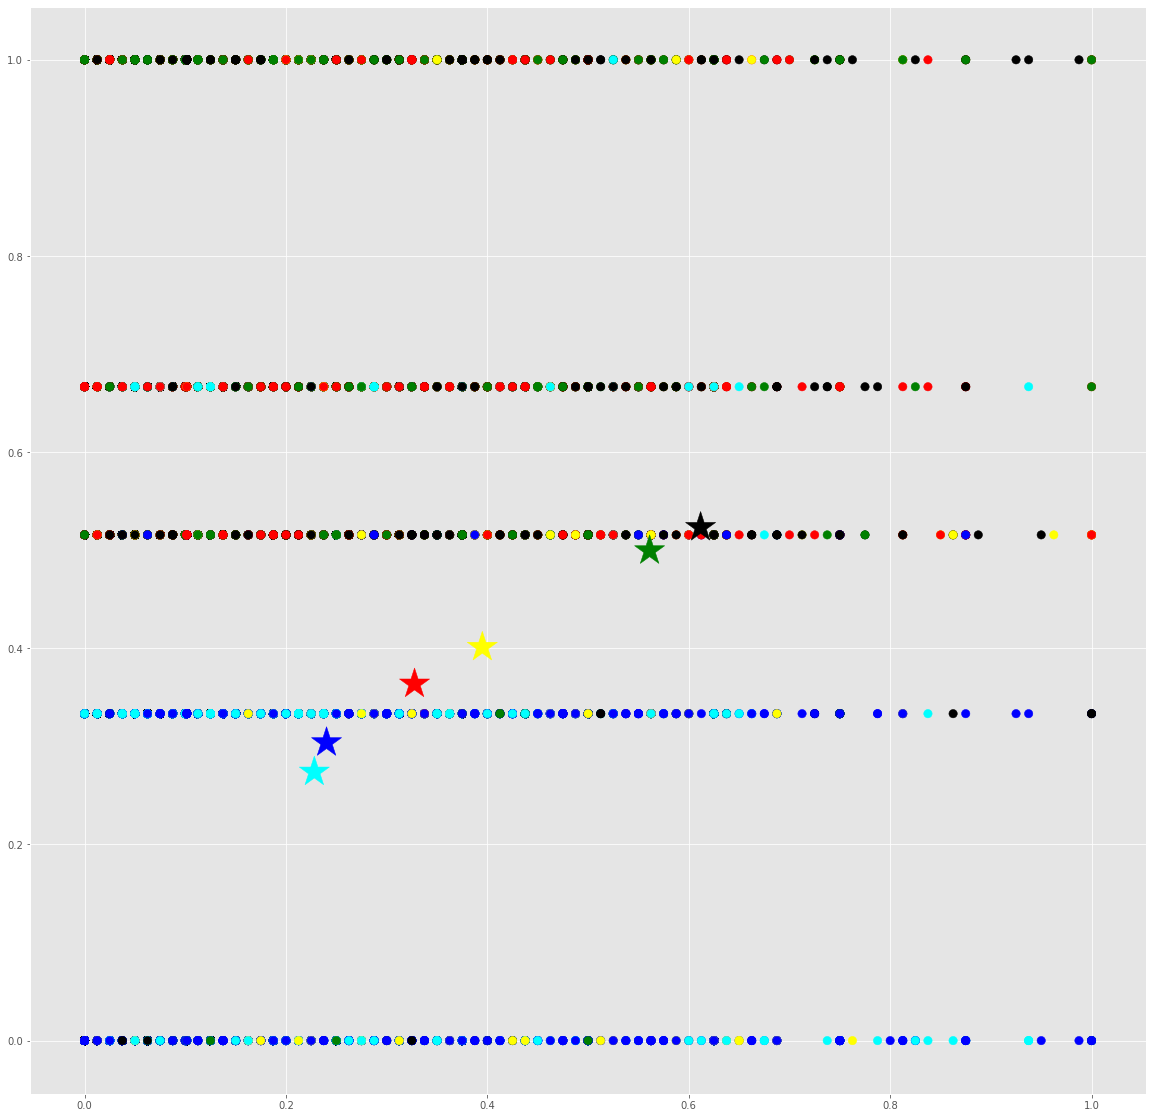

In [59]:
# Hacemos una proyección a 2D con los diversos ejes 
f1 = df['antiguedad'].values
f2 = df['garages'].values

plt.figure(figsize=(20,20))
plt.scatter(f1, f2, c=asignar, s=70, )
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

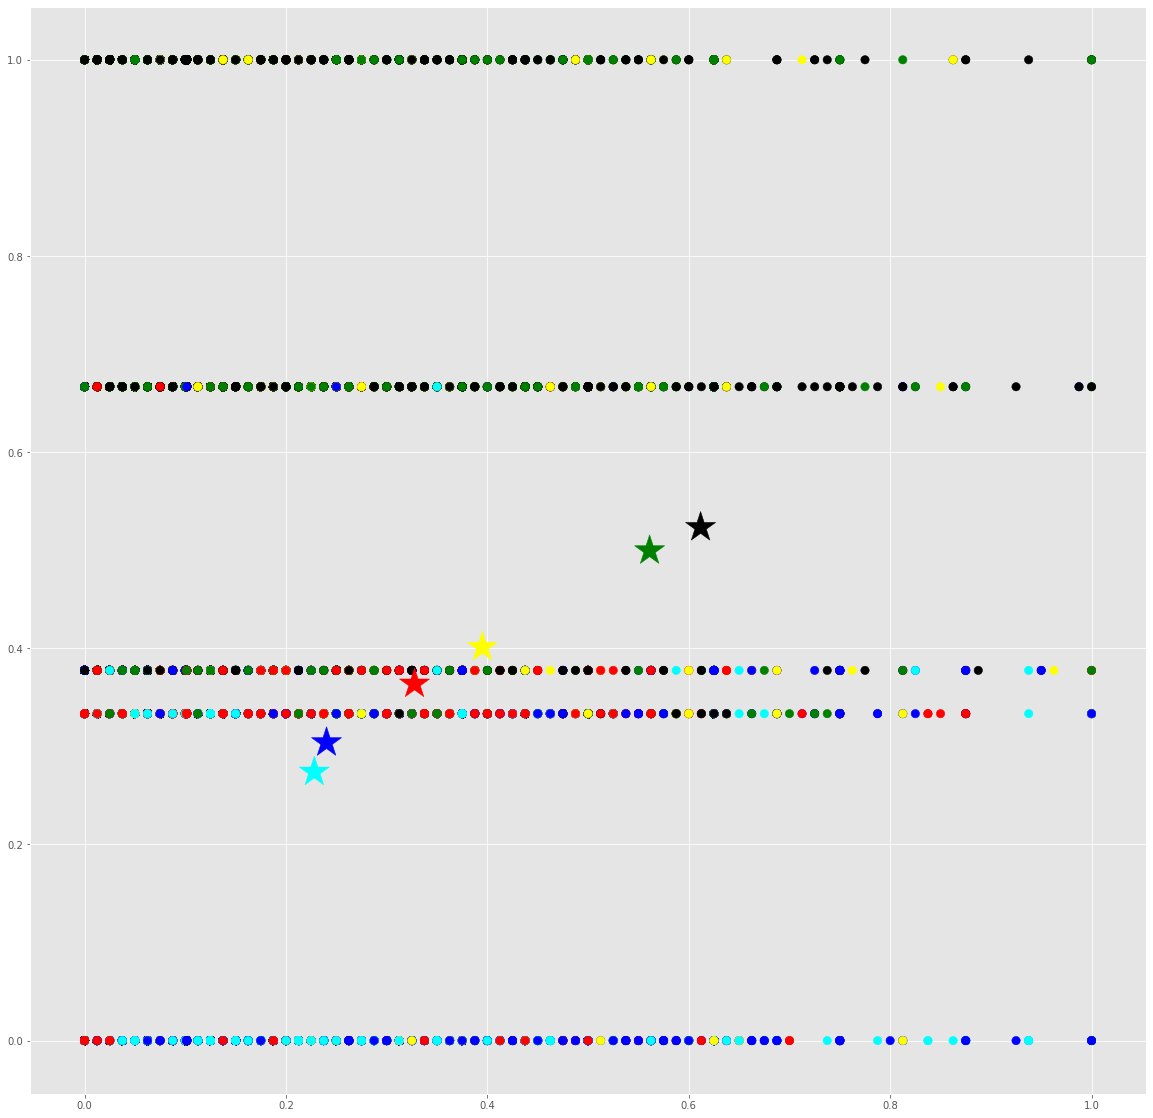

In [60]:
# Hacemos una proyección a 2D con los diversos ejes 
f1 = df['antiguedad'].values
f2 = df['banos'].values

plt.figure(figsize=(20,20))
plt.scatter(f1, f2, c=asignar, s=70, )
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

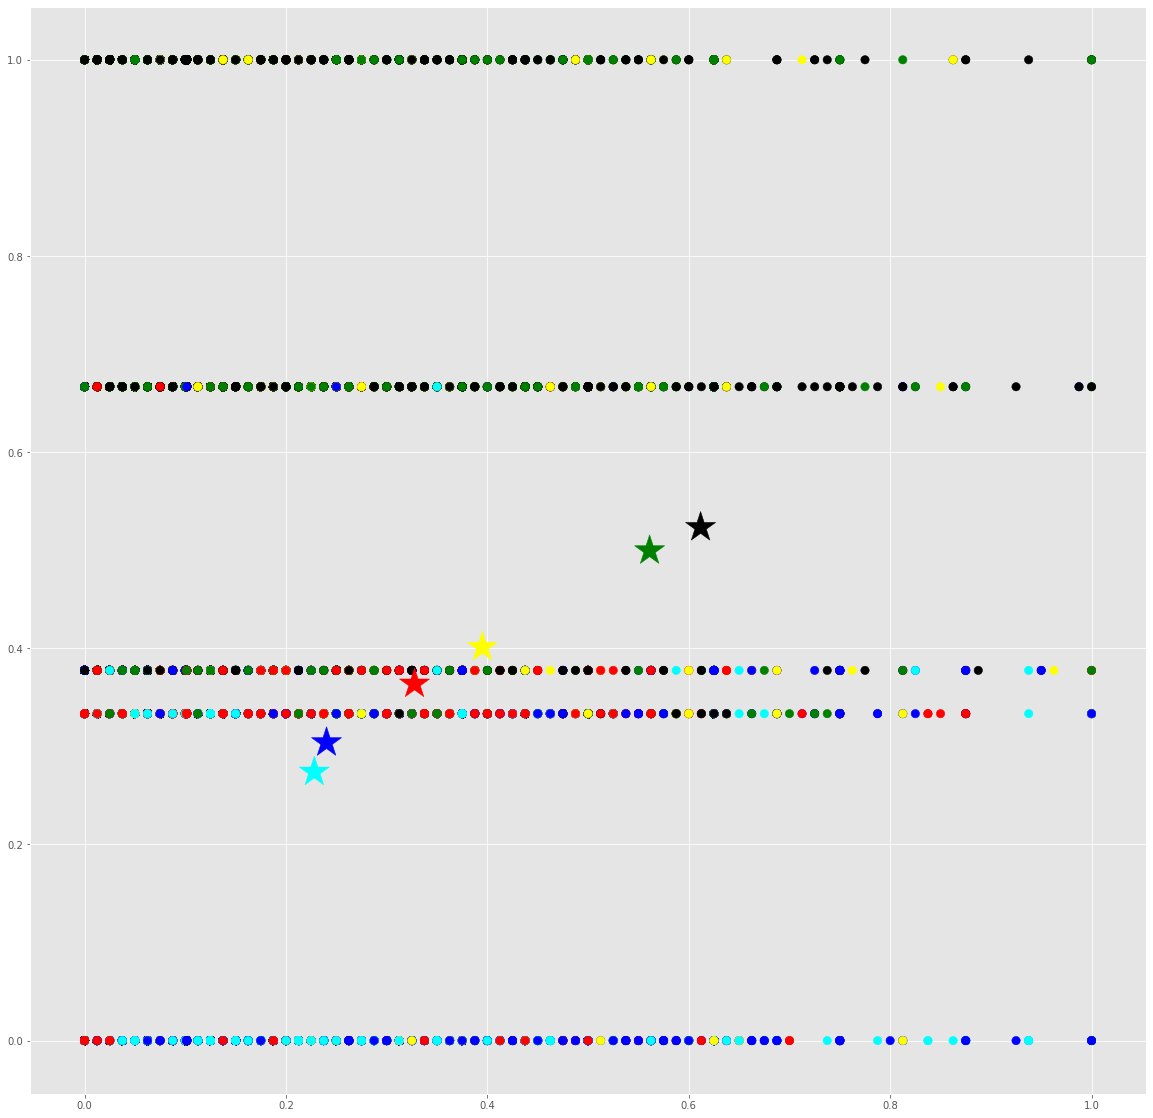

In [61]:
plt.figure(figsize=(20,20))
plt.scatter(f1, f2, c=asignar, s=70, )
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

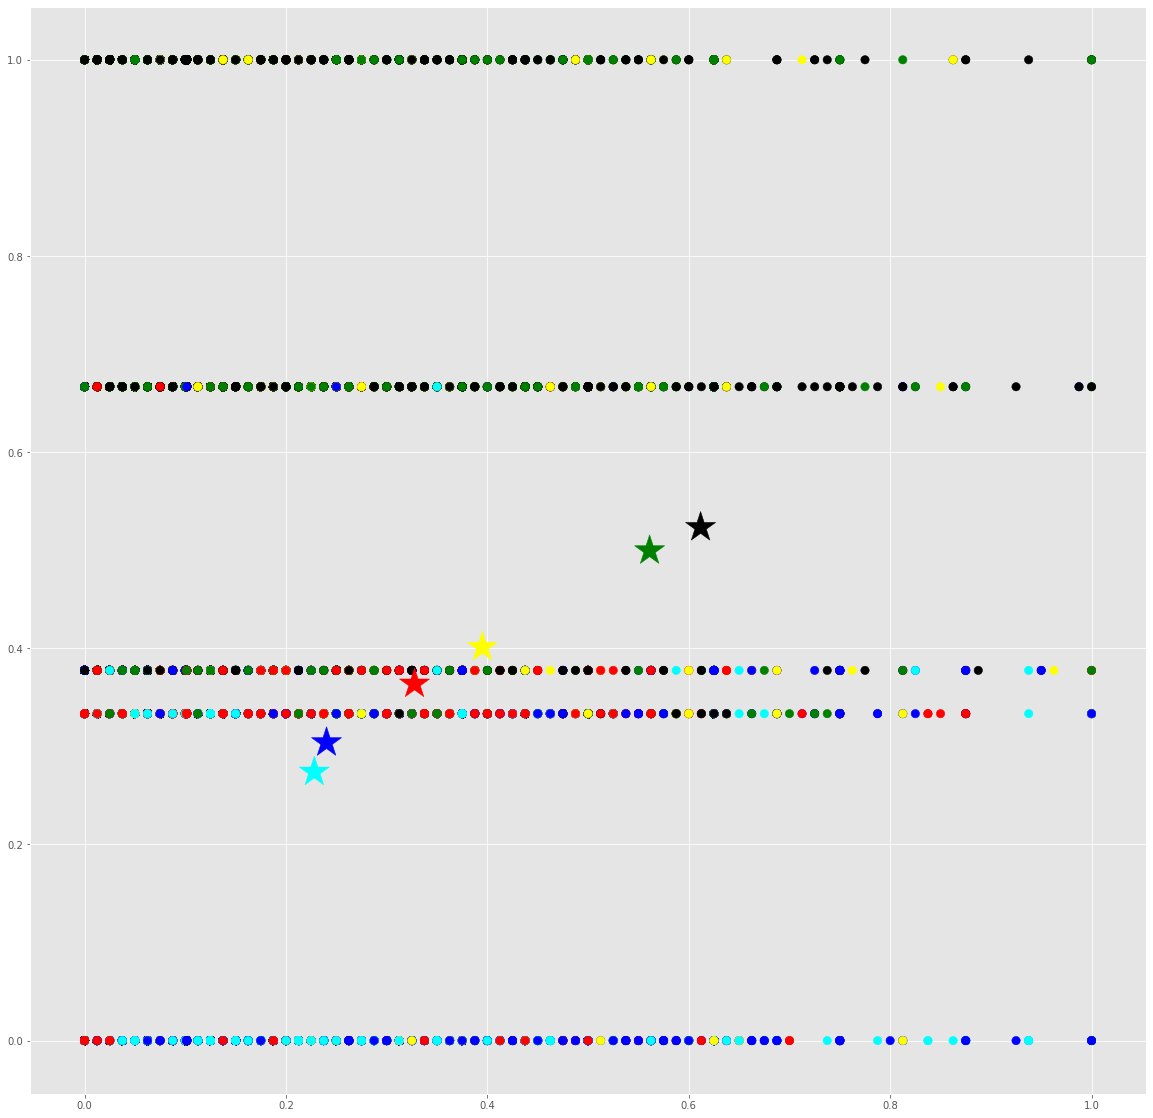

In [62]:
# Hacemos una proyección a 2D con los diversos ejes 
f1 = df['antiguedad'].values
f2 = df['banos'].values

plt.figure(figsize=(20,20))
plt.scatter(f1, f2, c=asignar, s=70, )
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

In [63]:
copy =  pd.DataFrame()
copy['id'] = df_aux['id'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color'] = colores
cantidadGrupo['cantidad'] = copy.groupby('label').size()

display(copy)
display(cantidadGrupo['cantidad'].sum())
display(cantidadGrupo)
copy.to_csv('./data/clustering_train.csv', index=False)

id  label
0       254099      2
1        53461      1
2       247984      0
3       209067      3
4       185997      2
...        ...    ...
239995  119879      0
239996  259178      1
239997  131932      2
239998  146867      1
239999  121958      0

[240000 rows x 2 columns]

240000

color  cantidad
0     red     47593
1   green     35577
2    blue     46722
3    cyan     52338
4  yellow     18679
5   black     39091

#### Con el set de testeo

In [64]:
df_test = pd.read_csv('./data/test.csv')
df_aux = df_test

In [65]:
columnas = ['metroscubiertos', 'metrostotales', 'antiguedad', 'habitaciones', 'garages', 'banos',
            'lat', 'lng', 'escuelascercanas', 'centroscomercialescercanos']
df = df_aux[columnas]

for columna in columnas:
    df[columna] = df[columna].fillna(df[columna].mean())
df

/home/tomas/Escritorio/kmeans/datos-tp2/.venv/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


metroscubiertos  metrostotales  antiguedad  habitaciones   garages  \
0                300.0     176.400232   29.000000           3.0  1.547605   
1                 67.0      67.000000    8.152599           1.0  1.000000   
2                 87.0     100.000000    0.000000           2.0  1.000000   
3                 86.0      86.000000    2.000000           2.0  2.000000   
4                 80.0      76.000000   10.000000           2.0  1.000000   
...                ...            ...         ...           ...       ...   
59995            291.0     176.400232   20.000000           4.0  3.000000   
59996             71.0      87.000000   10.000000           3.0  1.000000   
59997            102.0     176.400232    5.000000           3.0  2.000000   
59998            130.0     144.000000    0.000000           2.0  1.000000   
59999            211.0     130.000000    0.000000           3.0  2.000000   

       banos        lat         lng  escuelascercanas  \
0        4.0  19.408668  -99.246767               0.0   
1        1.0  21.032480  -89.592424               0.0   
2        2.0  19.332829  -99.152913               0.0   
3        2.0  16.860487  -99.878383               0.0   
4        1.0  19.640482  -99.127273               1.0   
...      ...        ...         ...               ...   
59995    3.0  19.434821  -99.092517               1.0   
59996    2.0  20.713830  -99.561640               1.0   
59997    2.0  20.713830  -99.561640               1.0   
59998    2.0  20.591773 -100.327615               1.0   
59999    2.0  20.656012 -103.427092               1.0   

       centroscomercialescercanos  
0                             0.0  
1                             0.0  
2                             1.0  
3                             0.0  
4                             1.0  
...                           ...  
59995                         1.0  
59996                         1.0  
59997                         1.0  
59998                         1.0  
59999                         1.0  

[60000 rows x 10 columns]

In [66]:
# Normalizacion
x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)

df.columns = columnas

display(df)
display(df.dtypes)

# for columna in columnas:
#     df[columna] = df[columna].astype(int)
df

metroscubiertos  metrostotales  antiguedad  habitaciones   garages  \
0             0.672170       0.380661    0.362500      0.222222  0.515868   
1             0.122642       0.122642    0.101907      0.000000  0.333333   
2             0.169811       0.200472    0.000000      0.111111  0.333333   
3             0.167453       0.167453    0.025000      0.111111  0.666667   
4             0.153302       0.143868    0.125000      0.111111  0.333333   
...                ...            ...         ...           ...       ...   
59995         0.650943       0.380661    0.250000      0.333333  1.000000   
59996         0.132075       0.169811    0.125000      0.222222  0.333333   
59997         0.205189       0.380661    0.062500      0.222222  0.666667   
59998         0.271226       0.304245    0.000000      0.111111  0.333333   
59999         0.462264       0.271226    0.000000      0.222222  0.666667   

          banos       lat       lng  escuelascercanas  \
0      1.000000  0.448899  0.099535               0.0   
1      0.000000  0.462665  0.142006               0.0   
2      0.333333  0.448256  0.099947               0.0   
3      0.333333  0.427296  0.096756               0.0   
4      0.000000  0.450864  0.100060               1.0   
...         ...       ...       ...               ...   
59995  0.666667  0.449120  0.100213               1.0   
59996  0.333333  0.459964  0.098149               1.0   
59997  0.333333  0.459964  0.098149               1.0   
59998  0.333333  0.458929  0.094780               1.0   
59999  0.333333  0.459473  0.081144               1.0   

       centroscomercialescercanos  
0                             0.0  
1                             0.0  
2                             1.0  
3                             0.0  
4                             1.0  
...                           ...  
59995                         1.0  
59996                         1.0  
59997                         1.0  
59998                         1.0  
59999                         1.0  

[60000 rows x 10 columns]

metroscubiertos               float64
metrostotales                 float64
antiguedad                    float64
habitaciones                  float64
garages                       float64
banos                         float64
lat                           float64
lng                           float64
escuelascercanas              float64
centroscomercialescercanos    float64
dtype: object

metroscubiertos  metrostotales  antiguedad  habitaciones   garages  \
0             0.672170       0.380661    0.362500      0.222222  0.515868   
1             0.122642       0.122642    0.101907      0.000000  0.333333   
2             0.169811       0.200472    0.000000      0.111111  0.333333   
3             0.167453       0.167453    0.025000      0.111111  0.666667   
4             0.153302       0.143868    0.125000      0.111111  0.333333   
...                ...            ...         ...           ...       ...   
59995         0.650943       0.380661    0.250000      0.333333  1.000000   
59996         0.132075       0.169811    0.125000      0.222222  0.333333   
59997         0.205189       0.380661    0.062500      0.222222  0.666667   
59998         0.271226       0.304245    0.000000      0.111111  0.333333   
59999         0.462264       0.271226    0.000000      0.222222  0.666667   

          banos       lat       lng  escuelascercanas  \
0      1.000000  0.448899  0.099535               0.0   
1      0.000000  0.462665  0.142006               0.0   
2      0.333333  0.448256  0.099947               0.0   
3      0.333333  0.427296  0.096756               0.0   
4      0.000000  0.450864  0.100060               1.0   
...         ...       ...       ...               ...   
59995  0.666667  0.449120  0.100213               1.0   
59996  0.333333  0.459964  0.098149               1.0   
59997  0.333333  0.459964  0.098149               1.0   
59998  0.333333  0.458929  0.094780               1.0   
59999  0.333333  0.459473  0.081144               1.0   

       centroscomercialescercanos  
0                             0.0  
1                             0.0  
2                             1.0  
3                             0.0  
4                             1.0  
...                           ...  
59995                         1.0  
59996                         1.0  
59997                         1.0  
59998                         1.0  
59999                         1.0  

[60000 rows x 10 columns]

In [67]:
X = np.array(df[columnas])

In [ ]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
# score = [kmeans[i].fit(X).score(X) for i in range(20)]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()


# Vamos a usar 6

In [ ]:
# Elijo 6 como un buen valor de K. Pero podría ser otro.

kmeans = KMeans(n_clusters=6).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

In [ ]:
# Obtenemos las etiquetas de cada punto de nuestros datos
labels = kmeans.predict(X)
# Obtenemos los centroids
C = kmeans.cluster_centers_
colores=['red','green','blue','cyan','yellow', 'black']
asignar=[]
for row in labels:
    asignar.append(colores[row])

fig = plt.figure(figsize=(20,20))
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

In [ ]:
# Hacemos una proyección a 2D con los diversos ejes 
f1 = df['metroscubiertos'].values
f2 = df['metrostotales'].values

plt.figure(figsize=(20,20))
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

In [ ]:
# Hacemos una proyección a 2D con los diversos ejes 
f1 = df['antiguedad'].values
f2 = df['metrostotales'].values

plt.figure(figsize=(20,20))
plt.scatter(f1, f2, c=asignar, s=70, )
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

In [ ]:
# Hacemos una proyección a 2D con los diversos ejes 
f1 = df['escuelascercanas'].values
f2 = df['centroscomercialescercanos'].values

plt.figure(figsize=(20,20))
plt.scatter(f1, f2, c=asignar, s=70, )
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

In [ ]:
# Hacemos una proyección a 2D con los diversos ejes 
f1 = df['antiguedad'].values
f2 = df['habitaciones'].values

plt.figure(figsize=(20,20))
plt.scatter(f1, f2, c=asignar, s=70, )
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

In [ ]:
# Hacemos una proyección a 2D con los diversos ejes 
f1 = df['antiguedad'].values
f2 = df['garages'].values

plt.figure(figsize=(20,20))
plt.scatter(f1, f2, c=asignar, s=70, )
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

In [ ]:
# Hacemos una proyección a 2D con los diversos ejes 
f1 = df['antiguedad'].values
f2 = df['banos'].values

plt.figure(figsize=(20,20))
plt.scatter(f1, f2, c=asignar, s=70, )
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

In [ ]:
plt.figure(figsize=(20,20))
plt.scatter(f1, f2, c=asignar, s=70, )
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

In [ ]:
# Hacemos una proyección a 2D con los diversos ejes 
f1 = df['antiguedad'].values
f2 = df['banos'].values

plt.figure(figsize=(20,20))
plt.scatter(f1, f2, c=asignar, s=70, )
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

In [ ]:
copy =  pd.DataFrame()
copy['id'] = df_aux['id'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color'] = colores
cantidadGrupo['cantidad'] = copy.groupby('label').size()

display(copy)
display(cantidadGrupo['cantidad'].sum())
display(cantidadGrupo)
copy.to_csv('./data/clustering_test.csv', index=False)